In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def trenowanie(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, X_train, y_train, X_test, y_test):
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    return mse


def parametr(n_estimators_values, fixed_params, X_train, y_train, X_test, y_test):
    mse_values = []

    for value in n_estimators_values:
        # Set the current n_estimators value in fixed_params
        fixed_params['n_estimators'] = value

        # Train and evaluate the model with the current n_estimators value
        mse = trenowanie(**fixed_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
        mse_values.append(mse)

    # Plot the results
    plt.plot(n_estimators_values, mse_values, marker='o')
    plt.title('MSE vs n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Mean Squared Error')
    plt.show()


223.62090798330772
208.96699794781787
200.4878490857833
196.4858724461665
192.91928034682525
194.04240483422984
197.12106519166605
199.79202841623786
203.96668550518328
204.88298397754315
209.73919549084383
213.492733962069
218.49753222935354
222.81879449004742
228.75524080444487


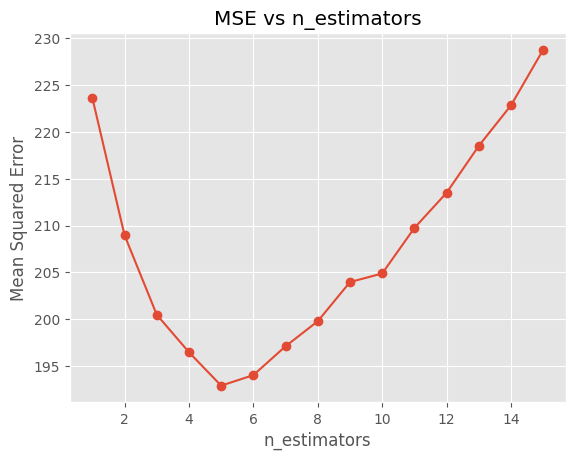

In [62]:
fixed_params = {
    'max_depth': 5,
    'min_samples_split': 9,
    'min_samples_leaf': 6,
    'max_features': 0.5
}

n_estimators_values = list(range(1, 16,1))
parametr(n_estimators_values, fixed_params, X_train, y_train, X_test, y_test)

In [35]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 10)
    max_depth = trial.suggest_int('max_depth', 1000, 3000)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                      max_features=max_features, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize') 
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(1000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 600 or best_mse <= improvement_threshold:  
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)



[I 2023-11-15 09:55:31,822] A new study created in memory with name: no-name-18b1d576-088b-4f74-9d96-5427f21da1fd
[I 2023-11-15 09:55:31,839] Trial 0 finished with value: 208.98391022958887 and parameters: {'n_estimators': 2, 'max_depth': 2848, 'min_samples_split': 19, 'min_samples_leaf': 20, 'max_features': 0.5033029855992376}. Best is trial 0 with value: 208.98391022958887.
[I 2023-11-15 09:55:31,903] Trial 1 finished with value: 198.87411197975575 and parameters: {'n_estimators': 4, 'max_depth': 2597, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 0.969572559417462}. Best is trial 1 with value: 198.87411197975575.
[I 2023-11-15 09:55:31,922] Trial 2 finished with value: 198.3687018175076 and parameters: {'n_estimators': 5, 'max_depth': 2041, 'min_samples_split': 8, 'min_samples_leaf': 14, 'max_features': 0.1342053403817217}. Best is trial 2 with value: 198.3687018175076.
[I 2023-11-15 09:55:31,966] Trial 3 finished with value: 195.4482472036026 and parameters: {'n_es

Best Parameters: {'n_estimators': 6, 'max_depth': 1372, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 0.4169153332198624}
Best Mean Squared Error: 184.7698719494337


C:\Users\48516\AppData\Local\Temp\ipykernel_5780\3829933525.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)
C:\Users\48516\AppData\Local\Temp\ipykernel_5780\3829933525.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(study)
[W 2023-11-15 09:57:06,755] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.
C:\Users\48516\AppData\Local\Temp\ipykernel_5780\3829933525.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

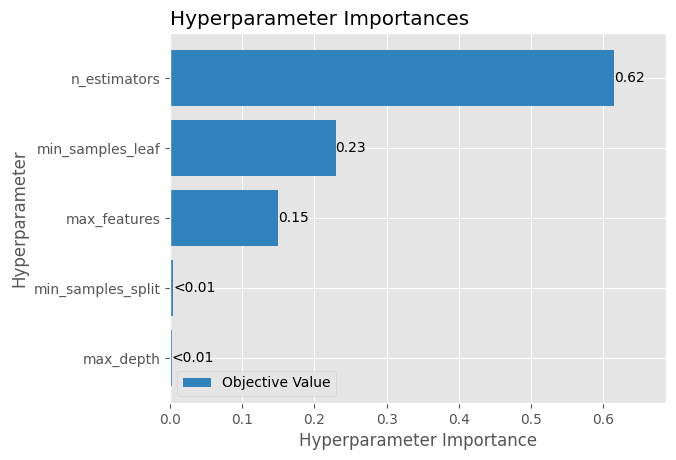

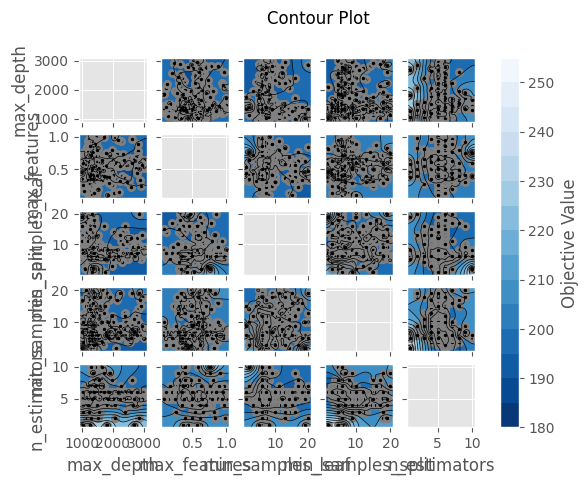

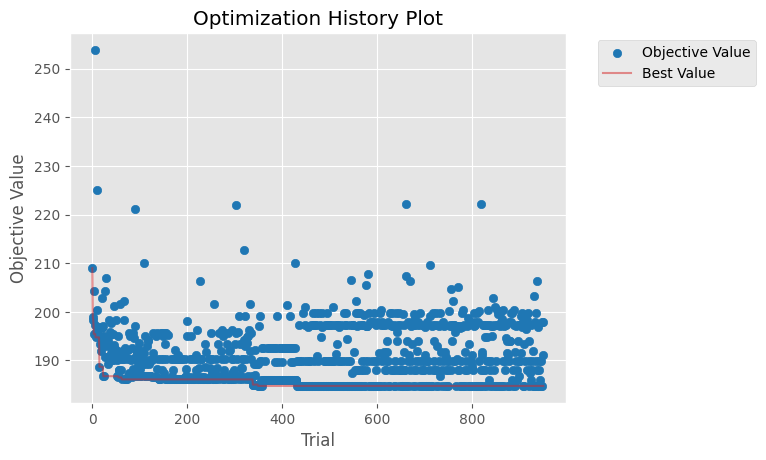

In [36]:
optuna.visualization.matplotlib.plot_param_importances(study)
optuna.visualization.matplotlib.plot_contour(study)
optuna.visualization.matplotlib.plot_optimization_history(study)

Średni błąd kwadratowy (MSE): 184.7698719494337
Procentowa zgodność: -13.65%


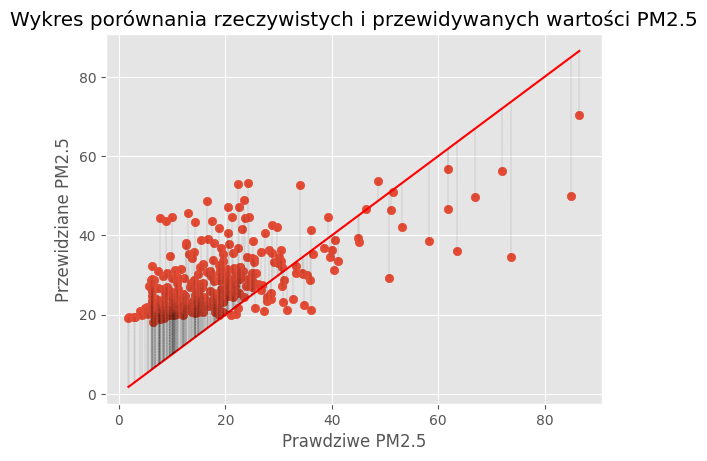

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
94,46.41,46.630762,0.220762
257,22.30,21.765801,0.534199
90,51.58,51.021957,0.558043
217,26.70,26.139732,0.560268
47,26.81,27.542415,0.732415
...,...,...,...
132,8.90,43.521113,34.621113
143,9.90,44.692504,34.792504
145,84.90,49.826840,35.073160
121,7.70,44.424591,36.724591


In [37]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


model = GradientBoostingRegressor(**best_params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]],'k--', lw=0.1)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = abs(results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)'])
results.sort_values('Różnica')
